In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Por Canales de YouTube

#### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [3]:
data_cat.sort_values(by="channel_title").head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
7096,nDDfFws3BfA,2017-12-19,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,2017-12-17 18:00:03+00:00,Top 10 10 Most #Mind Warehouse mind warehouse ...,1246572,16716,1884,...,False,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...",UCBR8-60-B28hp2BmDPdntcQ,Education,True
7319,nDDfFws3BfA,2017-12-20,"10,000 YEARS INTO THE FUTURE IN 10 MINUTES",#Mind Warehouse,27,2017-12-17 18:00:03+00:00,Top 10 10 Most #Mind Warehouse mind warehouse ...,1649569,20713,2375,...,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...",UCBR8-60-B28hp2BmDPdntcQ,Education,True
26490,u2qpVH_4L00,2018-04-05,Trichy Roommate | Ft. VJ Pappu | 1 Kg Biriyani,1 Kg Biriyani,23,2018-04-04 12:42:43+00:00,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",86263,5023,844,...,False,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
17402,SS_M2QGSJCA,2018-02-13,Normal Day vs Periods | Part 2 | With English ...,1 Kg Biriyani,23,2018-02-10 14:12:16+00:00,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",232059,9221,529,...,False,Orissa,19.820430,85.900017,POINT (85.90001746 19.82042971),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
23428,PtquZL4whd0,2018-03-19,Responding to Comments | Ep. 1 | 1 Kg Biriyani,1 Kg Biriyani,23,2018-03-18 11:40:53+00:00,"1 Kg Biriyani|""1 Kilo Biriyani""|""Tamil Funny V...",52622,3479,159,...,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True


In [4]:
canales = data_cat[["channel_title"]]

In [5]:
canales

,channel_title
0,Lokdhun Punjabi
1,HJ NEWS
2,TFPC
3,Eruma Saani
4,Filmylooks
...,...
38528,RDC Rajasthani
38529,Flowers TV
38530,Mazhavil Manorama
38531,Tarang TV


In [6]:
canales = canales.groupby(["channel_title"]).size().reset_index(name="frecuencia")

In [7]:
canales_top = canales.sort_values(by="frecuencia", ascending=False)

In [8]:
canales_top

,channel_title,frecuencia
1378,etvteluguindia,204
1275,VikatanTV,204
915,SAB TV,203
298,ETV Plus India,203
1036,Study IQ education,202
...,...,...
161,Bollywood Sins,1
496,KCT News,1
506,Kannada,1
512,Kannada Suddi,1


Como se puede observar los 5 canales que estan en tendencia con mayor frecuencia son: "VikatanTV", "SAB TV", "ETV Plus India", "etvteluguindia" y "Study IQ education"

In [9]:
canales_bot = canales.sort_values(by="frecuencia")

In [10]:
canales_bot

,channel_title,frecuencia
1055,T-Series Marathi,1
179,Business Of Cinema,1
545,Krishna Digital,1
189,COMEDY SONOTEK,1
420,Half Ticket Media,1
...,...,...
1036,Study IQ education,202
915,SAB TV,203
298,ETV Plus India,203
1275,VikatanTV,204


Y los 5 canales que han estado en tendencia una sola vez son: "JackieMT 2nd","Pakkatv","TeluguZ TV","Empty minds"y"Telugu Trending"

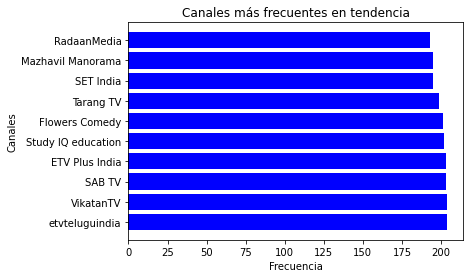

In [11]:
plt.barh(canales_top["channel_title"].head(10),canales_top["frecuencia"].head(10), color="blue")
plt.ylabel('Canales')
plt.xlabel('Frecuencia')
plt.title('Canales más frecuentes en tendencia')
plt.show()

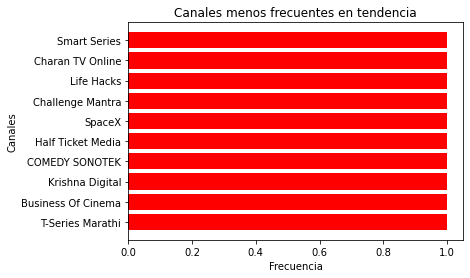

In [12]:
plt.barh(canales_bot["channel_title"].head(10),canales_bot["frecuencia"].head(10), color="red")
plt.ylabel('Canales')
plt.xlabel('Frecuencia')
plt.title('Canales menos frecuentes en tendencia')
plt.show()